In [46]:
from os import path
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import geopandas as gpd
import xarray as xr
import rioxarray
os.getcwd()



'/Users/Gabe/Desktop/phd/Macrosystems_resilience_workshop_2023/GEDI_file_processing/code'

<AxesSubplot:>

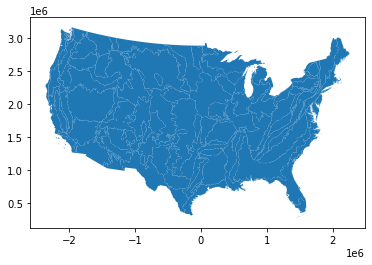

In [61]:
# Creating the path to the recovery group folder
ROOT_PATH = os.path.join("/Users/Gabe/Desktop/phd/recovery-group")
# Creating the path to the ecoregions data within the data folder in the recovery group drive
indir = os.path.join(ROOT_PATH, "data","ecoregions")
os.listdir(indir)

ecoregions = gpd.read_file(indir)
ecoregions.type


,US_L3CODE,US_L3NAME,NA_L3CODE,NA_L3NAME,NA_L2CODE,NA_L2NAME,NA_L1CODE,NA_L1NAME,L3_KEY,L2_KEY,L1_KEY,Shape_Leng,Shape_Area,geometry
0,1,Coast Range,7.1.8,Coast Range,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,1 Coast Range,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,3.127081e+05,1.872044e+09,"POLYGON ((-2284145.646 1942003.860, -2284260.1..."
1,1,Coast Range,7.1.8,Coast Range,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,1 Coast Range,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,4.051070e+02,6.470114e+03,"POLYGON ((-2326859.904 1961336.254, -2326870.1..."
2,1,Coast Range,7.1.8,Coast Range,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,1 Coast Range,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,6.693389e+03,4.503063e+05,"POLYGON ((-2326706.425 1962413.547, -2326701.8..."
3,1,Coast Range,7.1.8,Coast Range,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,1 Coast Range,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,1.866671e+02,2.298740e+03,"POLYGON ((-2328276.727 1965731.514, -2328270.7..."
4,1,Coast Range,7.1.8,Coast Range,7.1,MARINE WEST COAST FOREST,7,MARINE WEST COAST FOREST,1 Coast Range,7.1 MARINE WEST COAST FOREST,7 MARINE WEST COAST FOREST,2.391317e+02,1.898114e+03,"POLYGON ((-2332682.748 1971271.442, -2332679.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,85,Southern California/Northern Baja Coast,11.1.1,"California Coastal Sage, Chaparral, and Oak Wo...",11.1,MEDITERRANEAN CALIFORNIA,11,MEDITERRANEAN CALIFORNIA,85 Southern California/Northern Baja Coast,11.1 MEDITERRANEAN CALIFORNIA,11 MEDITERRANEAN CALIFORNIA,7.511930e+04,2.155485e+08,"POLYGON ((-2198077.887 1497678.348, -2197874.1..."
1246,85,Southern California/Northern Baja Coast,11.1.1,"California Coastal Sage, Chaparral, and Oak Wo...",11.1,MEDITERRANEAN CALIFORNIA,11,MEDITERRANEAN CALIFORNIA,85 Southern California/Northern Baja Coast,11.1 MEDITERRANEAN CALIFORNIA,11 MEDITERRANEAN CALIFORNIA,1.265318e+05,2.509660e+08,"POLYGON ((-2167907.736 1497929.296, -2167867.8..."
1247,85,Southern California/Northern Baja Coast,11.1.1,"California Coastal Sage, Chaparral, and Oak Wo...",11.1,MEDITERRANEAN CALIFORNIA,11,MEDITERRANEAN CALIFORNIA,85 Southern California/Northern Baja Coast,11.1 MEDITERRANEAN CALIFORNIA,11 MEDITERRANEAN CALIFORNIA,4.440926e+04,3.859671e+07,"POLYGON ((-2207921.025 1508177.661, -2207906.5..."
1248,85,Southern California/Northern Baja Coast,11.1.1,"California Coastal Sage, Chaparral, and Oak Wo...",11.1,MEDITERRANEAN CALIFORNIA,11,MEDITERRANEAN CALIFORNIA,85 Southern California/Northern Baja Coast,11.1 MEDITERRANEAN CALIFORNIA,11 MEDITERRANEAN CALIFORNIA,1.675743e+06,2.004232e+10,"POLYGON ((-2200157.466 1552356.151, -2199525.8..."


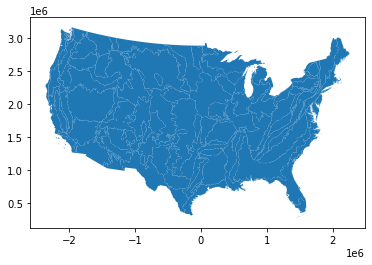

In [67]:
ecoregions.plot()
ecoregions

In [40]:
type(ecoregions)

geopandas.geodataframe.GeoDataFrame

In [69]:
print(ecoregions.US_L3NAME.unique())

so_rock = ecoregions.loc[ecoregions['US_L3NAME'] == 'Southern Rockies']
so_rock.crs
so_rock = so_rock.to_crs('EPSG:4326')


['Coast Range' 'Columbia Plateau' 'Blue Mountains' 'Snake River Plain'
 'Central Basin and Range' 'Mojave Basin and Range' 'Northern Rockies'
 'Idaho Batholith' 'Middle Rockies' 'Wyoming Basin'
 'Wasatch and Uinta Mountains' 'Puget Lowland' 'Colorado Plateaus'
 'Southern Rockies' 'Arizona/New Mexico Plateau'
 'Arizona/New Mexico Mountains' 'Chihuahuan Deserts' 'High Plains'
 'Southwestern Tablelands' 'Central Great Plains' 'Flint Hills'
 'Cross Timbers' 'Willamette Valley' 'Edwards Plateau'
 'Southern Texas Plains' 'Texas Blackland Prairies'
 'East Central Texas Plains' 'Western Gulf Coastal Plain'
 'South Central Plains' 'Ouachita Mountains' 'Arkansas Valley'
 'Boston Mountains' 'Ozark Highlands' 'Cascades'
 'Central Irregular Plains' 'Canadian Rockies'
 'Northwestern Glaciated Plains' 'Northwestern Great Plains'
 'Nebraska Sand Hills' 'Piedmont' 'Northern Glaciated Plains'
 'Western Corn Belt Plains' 'Lake Agassiz Plain'
 'Northern Minnesota Wetlands' 'Sierra Nevada'
 'Northern Lakes

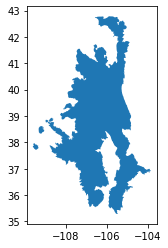

In [66]:
so_rock.plot()
#so_rock.to_file("/Users/Gabe/Desktop/phd/recovery-group/data/southernrockies.geojson", driver='GeoJSON')
#so_rock.to_file("/Users/Gabe/Desktop/phd/recovery-group/data/southernrockies_shp/southernrockies.shp")


<AxesSubplot:>

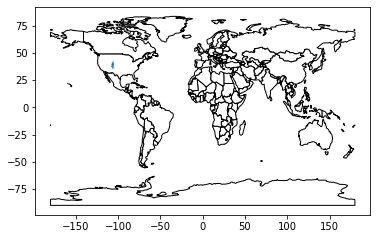

In [65]:
sr = gpd.read_file('/Users/Gabe/Desktop/phd/recovery-group/data/southernrockies.geojson')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black')
sr.plot(ax=base)